In [137]:
import pandas as pd
import numpy as np
import sys

In [138]:
sys.path.append('/home/kate/Research/YearBuilt/Notebooks/Property')
import ExperimentsUtils as eu

In [16]:
Data ={'PropertyExperimentsExtra.xlsx':['PartDepAge Data','PartDepAgeBase Data','PartDepWaterClaims Data'], 
        'HomeOwnersExperiments.xlsx':['PartDepHome Data','PartDepHWC Data'],
        'DwellingExperiments.xlsx':['PartDepF Data','PartDepFWC Data']}
DataDir='/home/kate/Research/YearBuilt/Experiments/'

In [11]:
Data.values()

dict_values([['PartDepAge Data', 'PartDepAgeBase Data', 'PartDepWaterClaims Data'], ['PartDepHome Data', 'PartDepHWC Data'], ['PartDepF Data', 'PartDepFWC Data']])

In [101]:
df = pd.DataFrame()
i = 0
for file,tabs in zip(Data.keys(),Data.values()):
    print('Processing file %s'%file)
    for tab in tabs:
        print('Tab %s'%tab)
        d = pd.read_excel(open('%s%s'%(DataDir,file), 'rb'), sheet_name=tab)
        pd_column = [x for x in d.columns if 'pd' in x][0]
        if i==0:
            df = d[['value',pd_column]]
            i = 1 +1
        else:
            df = pd.merge(df, d[[pd_column,'value']],how='outer', on=['value']).sort_values('value', ascending=True)


Processing file PropertyExperimentsExtra.xlsx
Tab PartDepAge Data
Tab PartDepAgeBase Data
Tab PartDepWaterClaims Data
Processing file HomeOwnersExperiments.xlsx
Tab PartDepHome Data
Tab PartDepHWC Data
Processing file DwellingExperiments.xlsx
Tab PartDepF Data
Tab PartDepFWC Data


In [102]:
df.head()

,value,PropertyAge_pd,PropertyAgeBase_pd,WaterClaims_pd,Home_pd,HomeWC_pd,Dwelling_pd,FWaterClaims_pd
0,0.000000,0.000816,0.000834,0.000550,0.001066,0.000635,0.000759,0.000538
1,2.224490,NaN,NaN,NaN,0.001053,0.000633,NaN,NaN
2,2.306122,0.001008,0.001012,0.000655,NaN,NaN,NaN,NaN
3,2.346939,NaN,NaN,NaN,NaN,NaN,0.000738,0.000538
4,4.448980,NaN,NaN,NaN,0.001884,0.001131,NaN,NaN


In [127]:
for c in df.columns:
    df['norm_'+c]=df[c]/max(df[c])

In [128]:
df.head()

,value,PropertyAge_pd,PropertyAgeBase_pd,WaterClaims_pd,Home_pd,HomeWC_pd,Dwelling_pd,FWaterClaims_pd,norm_value,norm_PropertyAge_pd,norm_PropertyAgeBase_pd,norm_WaterClaims_pd,norm_Home_pd,norm_HomeWC_pd,norm_Dwelling_pd,norm_FWaterClaims_pd
0,0.000000,0.000816,0.000834,0.000550,0.001066,0.000635,0.000759,0.000538,0.000000,0.223231,0.219289,0.199148,0.237426,0.186794,0.265454,0.255632
1,2.224490,NaN,NaN,NaN,0.001053,0.000633,NaN,NaN,0.019343,NaN,NaN,NaN,0.234394,0.186262,NaN,NaN
2,2.306122,0.001008,0.001012,0.000655,NaN,NaN,NaN,NaN,0.020053,0.275589,0.266193,0.237409,NaN,NaN,NaN,NaN
3,2.346939,NaN,NaN,NaN,NaN,NaN,0.000738,0.000538,0.020408,NaN,NaN,NaN,NaN,NaN,0.258307,0.255632
4,4.448980,NaN,NaN,NaN,0.001884,0.001131,NaN,NaN,0.038687,NaN,NaN,NaN,0.419508,0.332943,NaN,NaN


In [139]:
eu.SaveToExperimentLog('/home/kate/Research/YearBuilt/Experiments/FinalData.xlsx', 'Age Partial Dependency', df)

In [129]:
import bokeh
import bokeh.io
bokeh.io.output_notebook()
from bokeh.plotting import  figure, show
from bokeh.models import HoverTool   
class HoverHelper():

    def hovertool(self):
        tooltips = [                       
            ('value','@value'),
        ]
        ht = HoverTool(tooltips=tooltips)
        return ht
    def tools(self, standard_tools='pan,crosshair,wheel_zoom,zoom_in,zoom_out,undo,reset'):
        return [self.hovertool(), standard_tools]
hover = HoverHelper()    

Loading BokehJS ...

In [140]:
output_file("All Features To Base Features.html")
p = figure(plot_width=900, 
               plot_height=400,
               tools=hover.tools(),
               x_axis_label='Values',
               y_axis_label='Partial Dependency',
               title='Property Age Partial Dependency'
          )
p.circle(source=df, x='value', y='norm_PropertyAge_pd',color='green',legend_label='All Features')
p.circle(source=df, x='value', y='norm_PropertyAgeBase_pd',color='red',legend_label='Only Base Features')
show(p)

In [141]:
output_file("All Claims To Only Water Claims.html")
p = figure(plot_width=900, 
               plot_height=400,
               tools=hover.tools(),
               x_axis_label='Values',
               y_axis_label='Partial Dependency',
               title='Property Age Partial Dependency'
          )
p.circle(source=df, x='value', y='norm_PropertyAge_pd',color='green',legend_label='All Claims')
p.circle(source=df, x='value', y='norm_WaterClaims_pd',color='red',legend='Only Water Claims')
show(p)

In [142]:
output_file("All Claims To Homeowners and Dwelling Claims.html")
p = figure(plot_width=900, 
               plot_height=400,
               tools=hover.tools(),
               x_axis_label='Values',
               y_axis_label='Partial Dependency',
               title='Property Age Partial Dependency'
          )
p.circle(source=df, x='value', y='norm_PropertyAge_pd',color='green',legend_label='All Claims')
p.circle(source=df, x='value', y='norm_Home_pd',color='red',legend='HomeOwners Claims')
p.circle(source=df, x='value', y='norm_Dwelling_pd',color='blue',legend='Dwelling Claims')
show(p)

In [143]:
output_file("All Water Claims To Homeowners Water and Dwelling Water Claims.html")
p = figure(plot_width=900, 
               plot_height=400,
               tools=hover.tools(),
               x_axis_label='Values',
               y_axis_label='Partial Dependency',
               title='Property Age Partial Dependency based on Water Claims'
          )
p.circle(source=df, x='value', y='norm_WaterClaims_pd',color='green',legend_label='All Water Claims')
p.circle(source=df, x='value', y='norm_HomeWC_pd',color='red',legend='HomeOwners Water Claims')
p.circle(source=df, x='value', y='norm_FWaterClaims_pd',color='blue',legend='Dwelling Water Claims')
show(p)

In [144]:
ScoreData ={'PropertyExperimentsExtra.xlsx':['FinalPropertyAge Scores','FinalPropertyAgeBase Scores','FinalWaterClaims Scores'], 
        'HomeOwnersExperiments.xlsx':['FinalHome Scores','HWaterClaims Scores'],
        'DwellingExperiments.xlsx':['FinalF Scores','FinalFWC Scores']}

In [149]:
df_score = pd.DataFrame()
i = 0
for file,tabs in zip(ScoreData.keys(),ScoreData.values()):
    print('Processing file %s'%file)
    for tab in tabs:
        print('Tab %s'%tab)
        d = pd.read_excel(open('%s%s'%(DataDir,file), 'rb'), sheet_name=tab)
        d['Model']=tab
        df_score= df_score.append(d, ignore_index=True)

Processing file PropertyExperimentsExtra.xlsx
Tab FinalPropertyAge Scores
Tab FinalPropertyAgeBase Scores
Tab FinalWaterClaims Scores
Processing file HomeOwnersExperiments.xlsx
Tab FinalHome Scores
Tab HWaterClaims Scores
Processing file DwellingExperiments.xlsx
Tab FinalF Scores
Tab FinalFWC Scores


In [152]:
df_score.sort_values('Test gini', ascending=False)

,Model,Train ROC-AUC,Test ROC-AUC,Train gini,Test gini
2,FinalWaterClaims Scores,0.716125,0.711713,0.432250,0.423426
6,FinalFWC Scores,0.723898,0.710007,0.447795,0.420013
0,FinalPropertyAge Scores,0.689704,0.679609,0.379408,0.359218
1,FinalPropertyAgeBase Scores,0.676505,0.668889,0.353009,0.337778
5,FinalF Scores,0.689828,0.657233,0.379656,0.314466
4,HWaterClaims Scores,0.686393,0.641411,0.372786,0.282821
3,FinalHome Scores,0.665256,0.627787,0.330512,0.255575


In [155]:
eu.SaveToExperimentLog('/home/kate/Research/YearBuilt/Experiments/FinalData.xlsx', 'Models Scores', df_score)

In [154]:
FIData ={'PropertyExperimentsExtra.xlsx':['FinalPropertyAge FI','FinalPropertyAgeBase FI','FinalWaterClaims FI'], 
        'HomeOwnersExperiments.xlsx':['FinalHome FI','HWaterClaims FI'],
        'DwellingExperiments.xlsx':['FinalF FI','FinalFWC FI']}

In [158]:
df_fi = pd.DataFrame()
i = 0
for file,tabs in zip(FIData.keys(),FIData.values()):
    print('Processing file %s'%file)
    for tab in tabs:
        print('Tab %s'%tab)
        d = pd.read_excel(open('%s%s'%(DataDir,file), 'rb'), sheet_name=tab)
        d['Model']=tab
        df_fi= df_fi.append(d, ignore_index=True)

Processing file PropertyExperimentsExtra.xlsx
Tab FinalPropertyAge FI
Tab FinalPropertyAgeBase FI
Tab FinalWaterClaims FI
Processing file HomeOwnersExperiments.xlsx
Tab FinalHome FI
Tab HWaterClaims FI
Processing file DwellingExperiments.xlsx
Tab FinalF FI
Tab FinalFWC FI


In [163]:
df_fi.sort_values(['Model','Gain'], ascending=False)

,Weight,Gain,Cover,FeatureName,Model
28,5422,2.338654,3008.758246,cal_year-yearbuilt,HWaterClaims FI
31,2120,2.041630,1565.178656,cova_deductible,HWaterClaims FI
34,201,1.323785,1620.486730,usagetype_encd,HWaterClaims FI
30,7075,1.230086,1175.609617,sqft,HWaterClaims FI
29,5512,1.223634,1009.979074,water_risk_3_blk,HWaterClaims FI
32,6800,0.937009,455.432723,cova_limit,HWaterClaims FI
33,1132,0.834695,401.360485,constructioncd_encd,HWaterClaims FI
14,1847,4.331880,9340.738575,usagetype_encd,FinalWaterClaims FI
13,7708,3.070370,4055.792732,cal_year-yearbuilt,FinalWaterClaims FI
17,2903,2.836466,3134.958403,cova_deductible,FinalWaterClaims FI


In [164]:
eu.SaveToExperimentLog('/home/kate/Research/YearBuilt/Experiments/FinalData.xlsx', 'Models FI', df_fi)

In [240]:
import matplotlib.pyplot as plt

In [239]:
df_fi['Model'].unique()

array(['FinalPropertyAge FI', 'FinalPropertyAgeBase FI',
       'FinalWaterClaims FI', 'FinalHome FI', 'HWaterClaims FI',
       'FinalF FI', 'FinalFWC FI'], dtype=object)

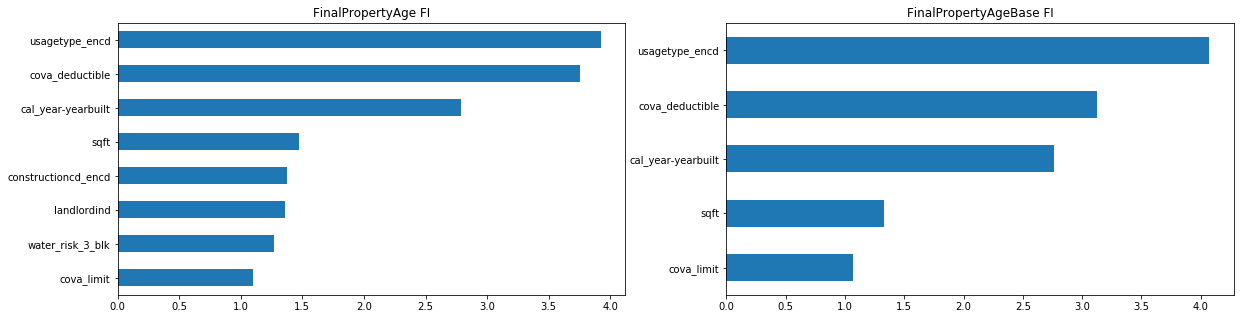

In [287]:
fig = plt.figure()
fig.set_size_inches([20, 5])
ax1 = fig.add_subplot(1, 2, 1)
ax1.yaxis.label.set_visible(False)
ax1.title.set_text('FinalPropertyAge FI')
df_fi[df_fi['Model']=='FinalPropertyAge FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax1,legend=None )
ax2 = fig.add_subplot(1, 2, 2)
ax2.yaxis.label.set_visible(False)
ax2.title.set_text('FinalPropertyAgeBase FI')
df_fi[df_fi['Model']=='FinalPropertyAgeBase FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax2,legend=None )
plt.savefig('Property All Features and only base Features models Feature Importance.png')

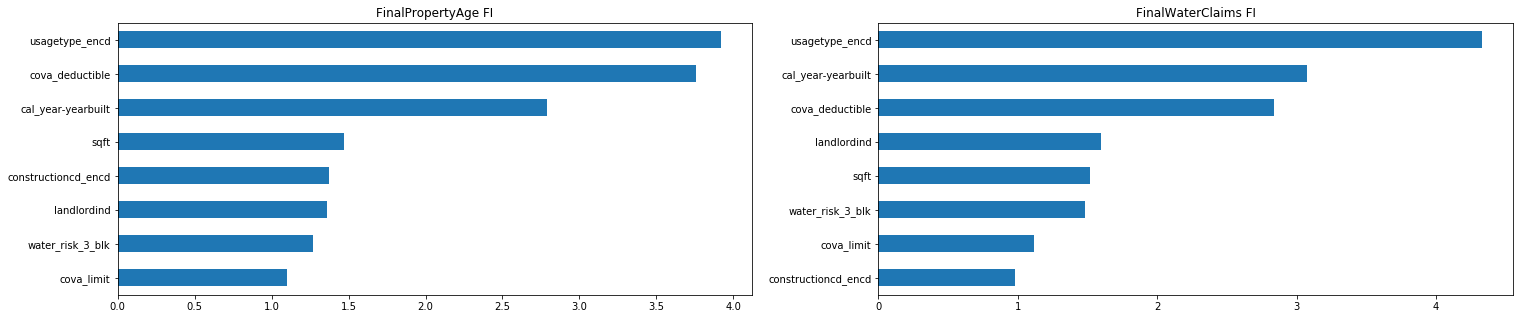

In [286]:
fig = plt.figure()
fig.set_size_inches([25, 5])
ax1 = fig.add_subplot(1, 2, 1)
ax1.yaxis.label.set_visible(False)
ax1.title.set_text('FinalPropertyAge FI')
df_fi[df_fi['Model']=='FinalPropertyAge FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax1,legend=None )
ax2 = fig.add_subplot(1, 2, 2)
ax2.yaxis.label.set_visible(False)
ax2.title.set_text('FinalWaterClaims FI')
df_fi[df_fi['Model']=='FinalWaterClaims FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax2,legend=None )
plt.savefig('All Property and Water Claims only Feature Importance.png')

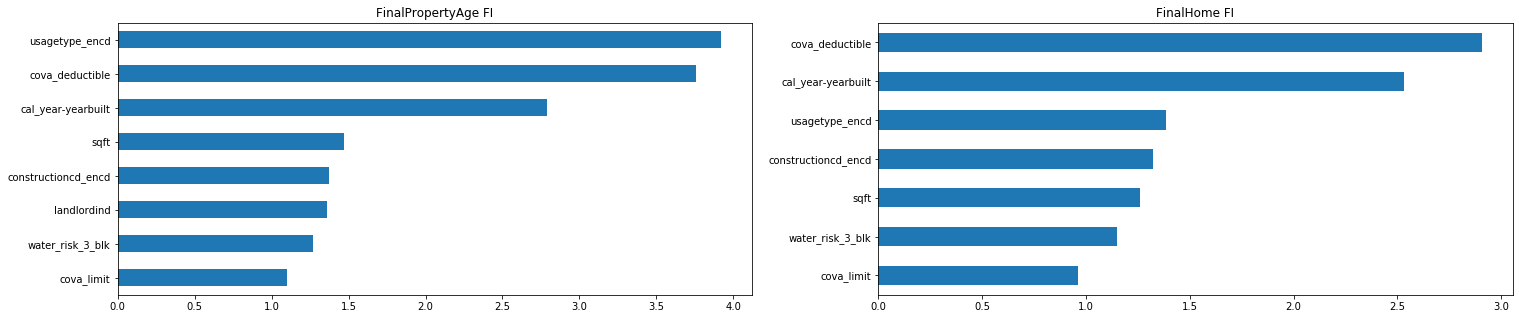

In [285]:
fig = plt.figure()
fig.set_size_inches([25, 5])
ax1 = fig.add_subplot(1, 2, 1)
ax1.yaxis.label.set_visible(False)
ax1.title.set_text('FinalPropertyAge FI')
df_fi[df_fi['Model']=='FinalPropertyAge FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax1,legend=None )
ax2 = fig.add_subplot(1, 2, 2)
ax2.yaxis.label.set_visible(False)
ax2.title.set_text('FinalHome FI')
df_fi[df_fi['Model']=='FinalHome FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax2,legend=None )
plt.savefig('All Property and HomeOwners Claims only Feature Importance.png')

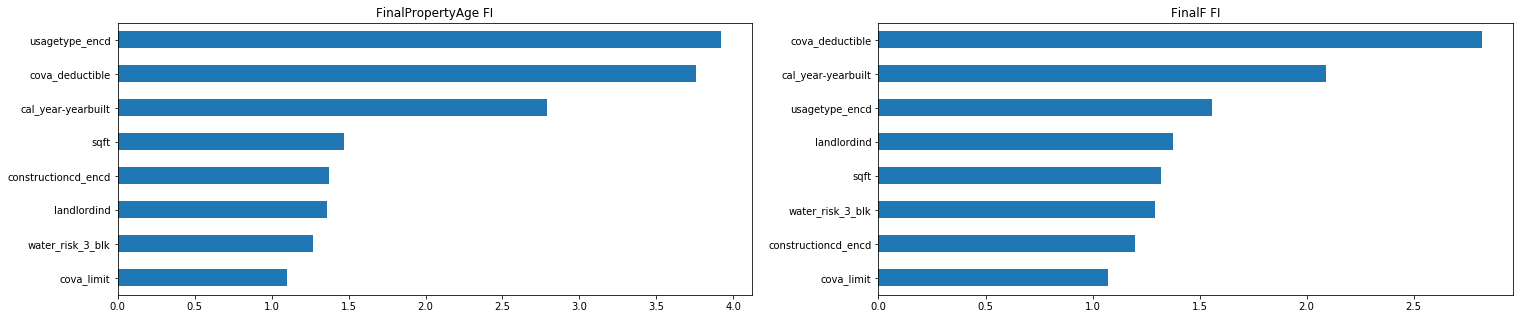

In [288]:
fig = plt.figure()
fig.set_size_inches([25, 5])
ax1 = fig.add_subplot(1, 2, 1)
ax1.yaxis.label.set_visible(False)
ax1.title.set_text('FinalPropertyAge FI')
df_fi[df_fi['Model']=='FinalPropertyAge FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax1,legend=None )
ax2 = fig.add_subplot(1, 2, 2)
ax2.yaxis.label.set_visible(False)
ax2.title.set_text('FinalF FI')
df_fi[df_fi['Model']=='FinalF FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax2,legend=None )
plt.savefig('All Property and Dwelling Claims only Feature Importance.png')

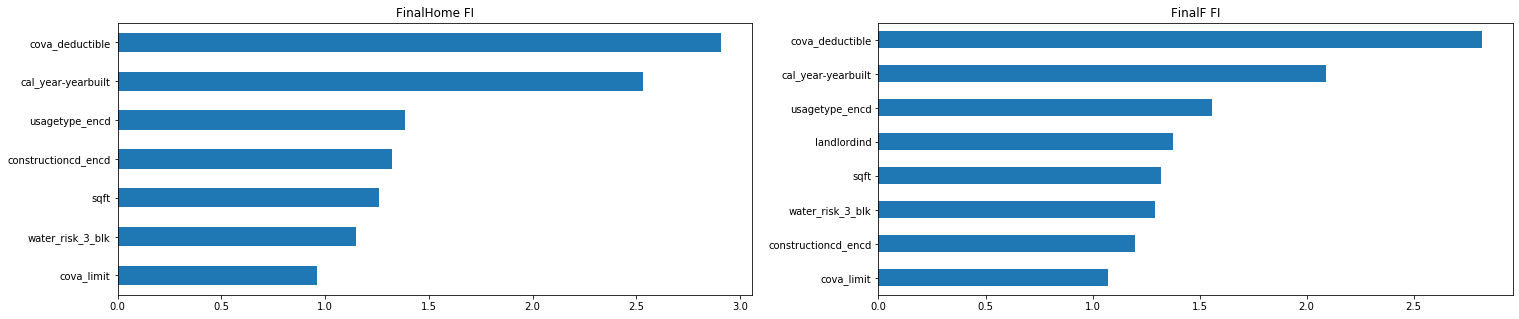

In [289]:
fig = plt.figure()
fig.set_size_inches([25, 5])
ax1 = fig.add_subplot(1, 2, 1)
ax1.yaxis.label.set_visible(False)
ax1.title.set_text('FinalHome FI')
df_fi[df_fi['Model']=='FinalHome FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax1,legend=None )
ax2 = fig.add_subplot(1, 2, 2)
ax2.yaxis.label.set_visible(False)
ax2.title.set_text('FinalF FI')
df_fi[df_fi['Model']=='FinalF FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax2,legend=None )
plt.savefig('Homeowners Claims and Dwelling Claims Feature Importance.png')

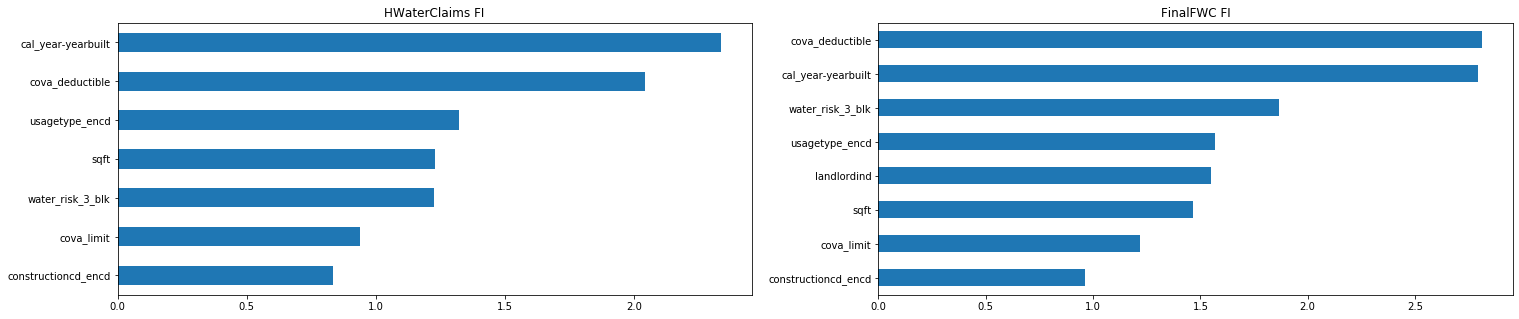

In [290]:
fig = plt.figure()
fig.set_size_inches([25, 5])
ax1 = fig.add_subplot(1, 2, 1)
ax1.yaxis.label.set_visible(False)
ax1.title.set_text('HWaterClaims FI')
df_fi[df_fi['Model']=='HWaterClaims FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax1,legend=None )
ax2 = fig.add_subplot(1, 2, 2)
ax2.yaxis.label.set_visible(False)
ax2.title.set_text('FinalFWC FI')
df_fi[df_fi['Model']=='FinalFWC FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax2,legend=None )
plt.savefig('Homeowners and Dwelling Water Claims Feature Importance.png')

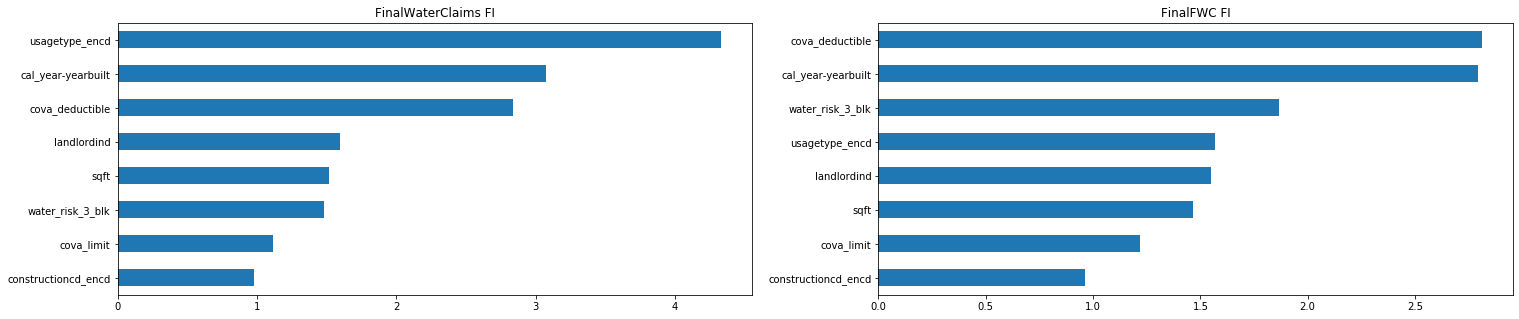

In [291]:
fig = plt.figure()
fig.set_size_inches([25, 5])
ax1 = fig.add_subplot(1, 2, 1)
ax1.yaxis.label.set_visible(False)
ax1.title.set_text('FinalWaterClaims FI')
df_fi[df_fi['Model']=='FinalWaterClaims FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax1,legend=None )
ax2 = fig.add_subplot(1, 2, 2)
ax2.yaxis.label.set_visible(False)
ax2.title.set_text('FinalFWC FI')
df_fi[df_fi['Model']=='FinalFWC FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax2,legend=None )
plt.savefig('All Property and Dwelling Water Claims Feature Importance.png')

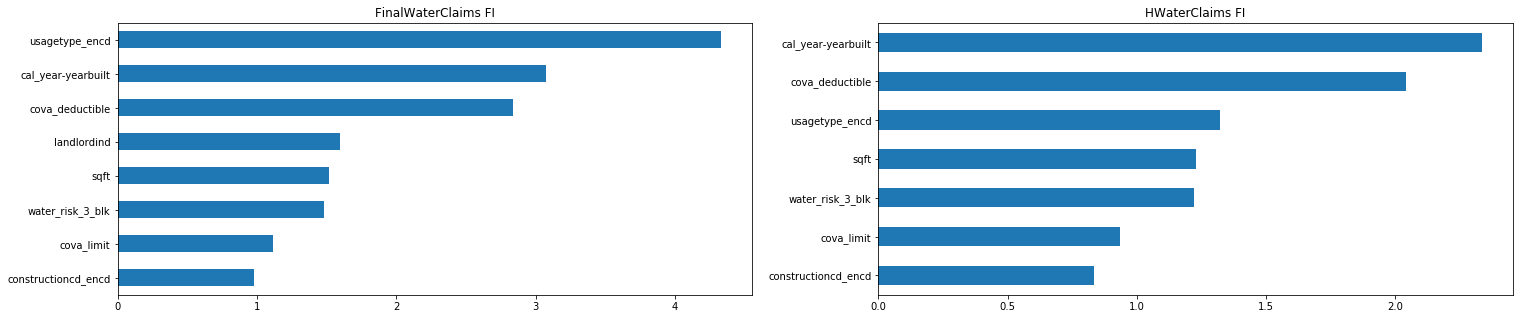

In [292]:
fig = plt.figure()
fig.set_size_inches([25, 5])
ax1 = fig.add_subplot(1, 2, 1)
ax1.yaxis.label.set_visible(False)
ax1.title.set_text('FinalWaterClaims FI')
df_fi[df_fi['Model']=='FinalWaterClaims FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax1,legend=None )
ax2 = fig.add_subplot(1, 2, 2)
ax2.yaxis.label.set_visible(False)
ax2.title.set_text('HWaterClaims FI')
df_fi[df_fi['Model']=='HWaterClaims FI'].sort_values(['Gain'], ascending=True).plot.barh('FeatureName', 'Gain',ax=ax2,legend=None )
plt.savefig('All Property and Homeowners Water Claims Feature Importance.png')